# Projekt 1
---


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Wcztanie danych digits
digits_data, digits_target = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_target, test_size=0.3)

#Skalowanie danych
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

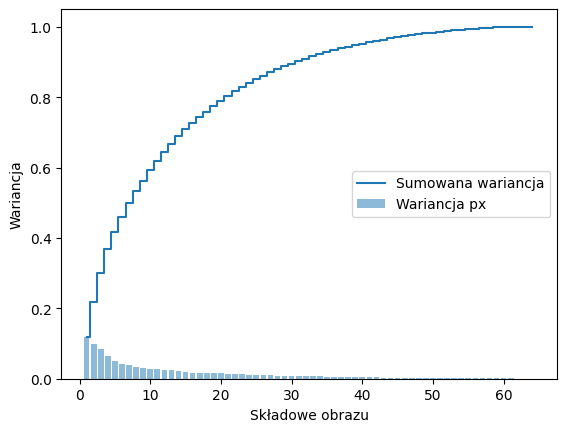

In [2]:
#Przekształcenie PCA
cov_mat = np.cov(X_train_std.T)
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat) 

sum_eigen_values = sum(eigen_values)
var_exp = [(eigen_val/sum_eigen_values) 
            for eigen_val in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='Wariancja px')
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where='mid', label='Sumowana wariancja')
plt.legend(loc='right')
plt.xlabel('Składowe obrazu')
plt.ylabel('Wariancja')
plt.show()

In [3]:
# Redukcja wymiarowości (transformacja cech)

# Grupowanie 
eigen_pair = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_vectors))]
eigen_pair.sort(key=lambda k:k[0], reverse=True)

#Macierz rzutowania
w = np.hstack((eigen_pair[0][1][:,np.newaxis],
               eigen_pair[1][1][:,np.newaxis],
               eigen_pair[2][1][:,np.newaxis]))

X_train_pca = X_train_std.dot(w)

In [4]:
# Reprezentacja danych w 3 wymiarach
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'index':range(X_train_pca.shape[0]), 
              'd1': X_train_pca[:,0],
              'd2': X_train_pca[:,1],
              'd3': X_train_pca[:,2],
              'number': [str(y) for y in y_train]})

df = df.sort_values(by=['number'])

fig = px.scatter_3d(df, x = 'd1',
                    y = 'd2',
                    z = 'd3',
                    color = 'number')
fig.show()
